In [17]:
import numpy as np

def lax_wend(c):
    dt = 0.04
    dx = 0.05
    nu = c*dt/dx

    # Max values of X and Y are 4
    n = int(10/dt)
    m = int(4/dx)

    X = np.linspace(-2, 2, m)
    T = np.linspace(-5, 5, n)

    U = np.zeros((m, n), dtype=np.float32)  # U at nth iteration
    # U at (n + 1)th iteration, yet to be calculated


    # Intializing U
    U[0:int(2/dx), 0] = X[0:int(2/dx)]+2
    U[int(2/dx):, 0] = 2 - X[int(2/dx):]
    U[0, :] = 0
    U[m-1, : ] = 0
    for i in range(0, n-1):
        for j in range(1, m-1):
            U[j, i+1] = U[j,i] - nu*(U[j+1,i] - U[j-1, i])/2 + (nu**2)*(U[j+1, i] - 2*U[j,i] + U[j-1, i])/2

    return U

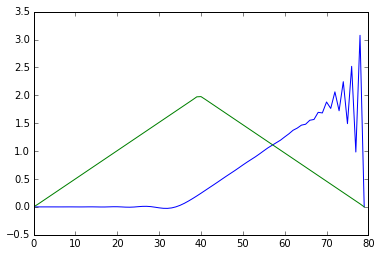

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
U1 = lax_wend(.2)
U2 = lax_wend(0.001)
plt.plot(U1[:, 220]);plt.plot(U2[:, 100])